In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("student_result.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

#Drop Unnamed Column

In [8]:
df=df.drop("Unnamed: 0",axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


CHANGE WEEKLY STUDY-HOURS COLUMNS

In [9]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","5-10")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


Gender Distribution

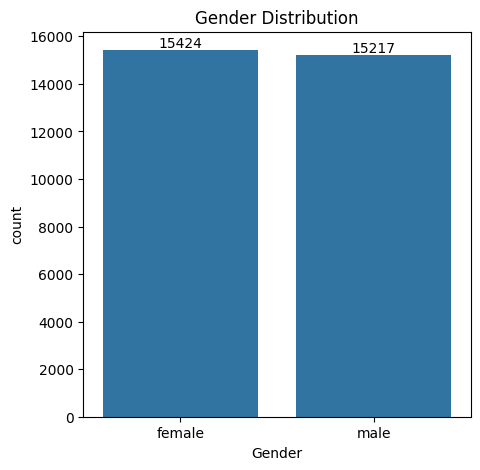

In [10]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data= df , x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

#From the above chart we have analyzed that number of females are more than number of males

In [11]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


#From the above data we have analysed that :
1.Children of Parents with Masters degree have more scores than that of other qualificatons.
2.Children of Parents with "Some high school" have least scores.

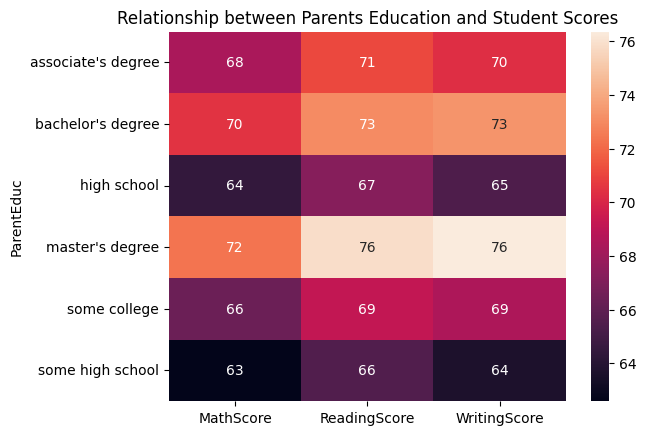

In [12]:
#Data Visualisaton using HeatMap 

sns.heatmap(gb,annot=True)
plt.title("Relationship between Parents Education and Student Scores")
plt.show()

The dark region shows the low scores i.e  64(and below) and the lighter region shows  higher scores

In [13]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


In [ ]:
#As we can see there is much difference in the average marks

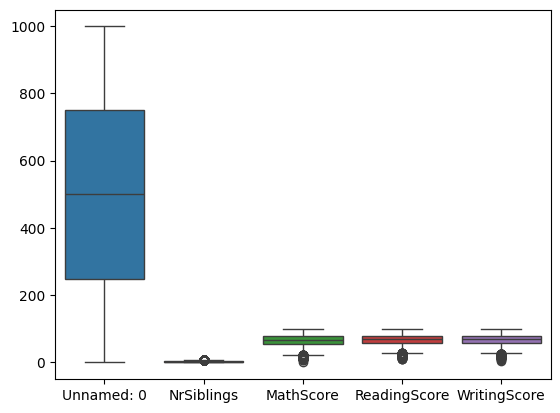

In [14]:
sns.boxplot(data=df)
plt.show()

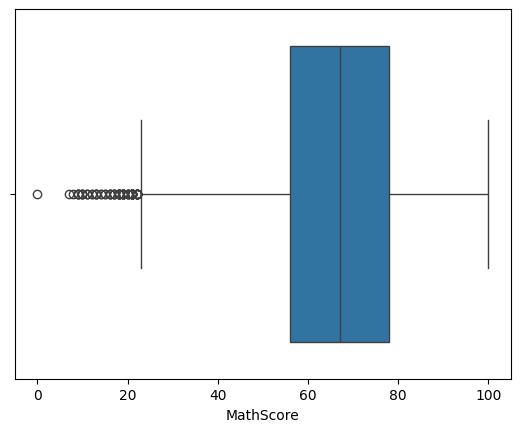

In [16]:
sns.boxplot(data=df,x="MathScore")
plt.show()

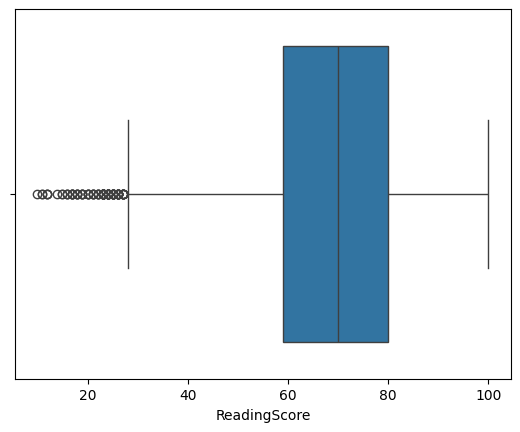

In [17]:
sns.boxplot(data=df,x="ReadingScore")
plt.show()

In [18]:
df["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

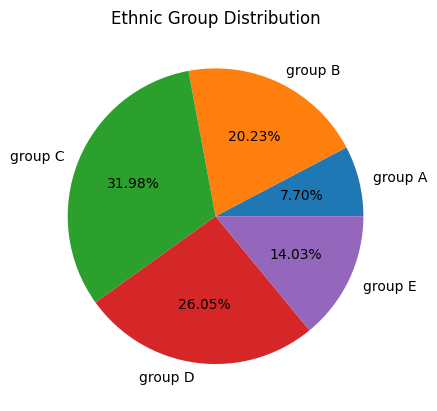

In [19]:
groupA = df.loc[(df["EthnicGroup"]=="group A")].count()
#groupA
groupB = df.loc[(df["EthnicGroup"]=="group B")].count()
groupC = df.loc[(df["EthnicGroup"]=="group C")].count()
groupD = df.loc[(df["EthnicGroup"]=="group D")].count()
groupE = df.loc[(df["EthnicGroup"]=="group E")].count()

l=["group A","group B","group C","group D","group E"]
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist , labels=l,autopct = "%1.2f%%")
plt.title("Ethnic Group Distribution")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

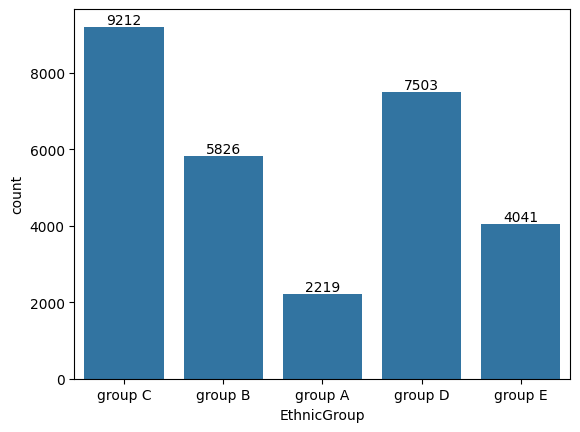

In [20]:
ax= sns.countplot(df,x="EthnicGroup")
ax.bar_label(ax.containers[0])

In [21]:
gb2 = df.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gb2

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


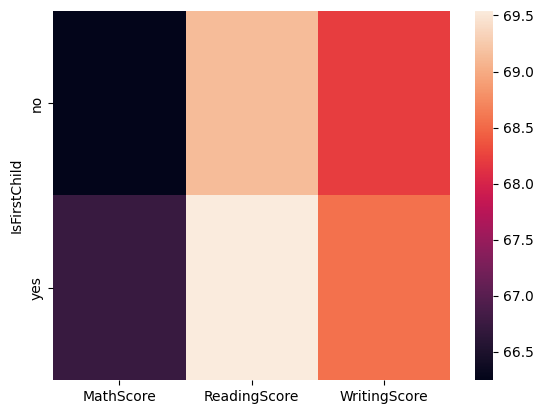

In [24]:
sns.heatmap(gb2)
plt.show()

Students who play sports regularly are fit and also perform better than those wh do not play sport 
This shows the importance of physical fitness


In [28]:
gb2 = df.groupby("IsFirstChild").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gb2

,MathScore,ReadingScore,WritingScore
IsFirstChild,,,
no,66.246832,69.132614,68.210887
yes,66.740646,69.542553,68.558484


In [29]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [31]:
gb3 = df.groupby("NrSiblings").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gb3

,MathScore,ReadingScore,WritingScore
NrSiblings,,,
0.0,66.819449,69.547812,68.746515
1.0,66.473896,69.259097,68.245345
2.0,66.554934,69.472018,68.522533
3.0,66.719092,69.488159,68.650498
4.0,66.245495,69.144169,68.073444
5.0,66.630303,69.453788,68.282576
6.0,65.917219,68.801325,67.860927
7.0,67.615120,69.828179,68.986254


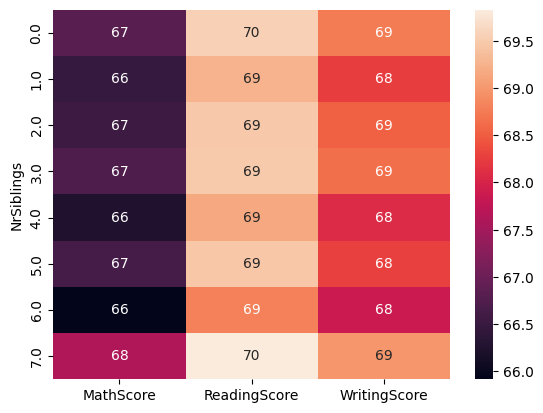

In [33]:
sns.heatmap(gb3,annot=True)
plt.show()

As we can see that there is not much impact on number of siblings in academics this shows that a student has to do his/her hardwork indivisually even if the student has an elder sibling.

In [35]:
gb4 = df.groupby("TransportMeans").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gb4

,MathScore,ReadingScore,WritingScore
TransportMeans,,,
private,66.511354,69.472364,68.509593
school_bus,66.674636,69.446206,68.492351


In [38]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","5-10")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


In [39]:
gb5 = df.groupby("WklyStudyHours").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gb5

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5-10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


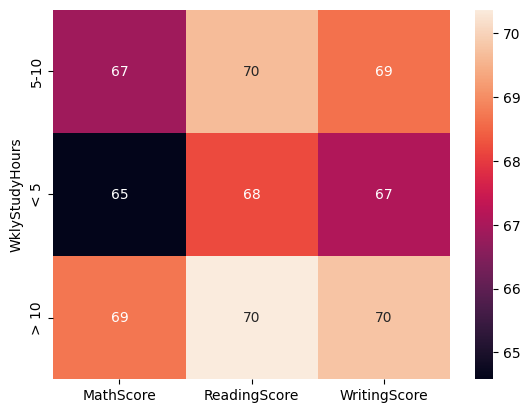

In [40]:
sns.heatmap(gb5,annot=True)
plt.show()

As we can see that student who study more number of hours have better marks

In [41]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75
